In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


# Tensor - Operations

In [2]:
x = torch.empty(5,3) # khoi tao 1 ma tran rong size (5,3)
y = torch.rand(5,3) # khoi tao 1 ma tran ngau nhien size (5,3)
z = torch.zeros(5,3)  # khoi tao 1 ma tran 0 size (5,3)
h = torch.tensor([[5, 3.5]])   # khoi tao 1 ma tran tu list 

print(x,y,z,h)
print(x.size())
print(torch.add(y,z), y+z)
print(torch.div(y,1))
print(y*x)
print(y[:,1], y[2,1], y[2][1])



tensor([[2.7123e-30, 3.0956e-41, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]]) tensor([[0.7475, 0.0080, 0.5408],
        [0.8807, 0.0230, 0.1295],
        [0.6222, 0.9886, 0.1542],
        [0.8541, 0.5966, 0.8408],
        [0.4552, 0.9567, 0.5797]]) tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) tensor([[5.0000, 3.5000]])
torch.Size([5, 3])
tensor([[0.7475, 0.0080, 0.5408],
        [0.8807, 0.0230, 0.1295],
        [0.6222, 0.9886, 0.1542],
        [0.8541, 0.5966, 0.8408],
        [0.4552, 0.9567, 0.5797]]) tensor([[0.7475, 0.0080, 0.5408],
        [0.8807, 0.0230, 0.1295],
        [0.6222, 0.9886, 0.1542],
        [0.8541, 0.5966, 0.8408],
        [0.4552, 0.9567, 0.5797]])
tensor([[0.7475, 0.0080, 0.5408],
        [0.8807, 0.0230, 0.1295],
        [0.6222, 0.9886, 0.1542

Kết nối với numpy

In [3]:
# convert từ torch tensor sang numpy
a= torch.ones(4)
print(a)
print(type(a))

b = a.numpy()
print(type(b))

# khi a thay đổi --> b cũng thay đổi vì b là giá trị numpy của a
a.add_(1)
print(a)
print(b)

# convert từ numpy sang torch tensor 
a = np.ones(5)
b=torch.from_numpy(a)
print(type(a), type(b))
print(a, b)

tensor([1., 1., 1., 1.])
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2.])
[2. 2. 2. 2.]
<class 'numpy.ndarray'> <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Kiểm tra CUDA tensor


In [4]:
# kiểm tra xem có tồn tại CUDA trên máy không. Lưu ý nếu đang sử dụng google colab, bạn phải bật GPU tại Runtime>change runtime type để enable CUDA.
if torch.cuda.is_available():
  device = torch.device("cuda") # Khởi tạo một cuda device object
  y = torch.ones_like(x, device = device) # Trực tiếp khởi tạo một tensor trên GPU
  x = x.to(device) # Truyền giá trị tensor vào thiết bị. Có thể truyền vào tên thiết bị: .to("cuda")
  z = x + y
  print(z)
  print(z.to("cpu", torch.double)) # Trong hàm .to() ta có thể thay định dạng dữ liệ

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00,        nan, 1.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2122e+04, 7.1846e+22],
        [1.0000e+00, 7.0374e+22, 1.0000e+00]], device='cuda:0')
tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00,        nan, 1.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2122e+04, 7.1846e+22],
        [1.0000e+00, 7.0374e+22, 1.0000e+00]], dtype=torch.float64)


# **Autograd: Tự động tính đạo hàm**
Trung tâm của toàn bộ các mạng nơ ron hoạt động trên pytorch là autograd package

**Chức năng của autograd**: Tự động tính toán đạo hàm trên toàn bộ các toán tử của tensors. Nó là một framework được định nghĩa trong quá trình chạy, có nghĩa rằng quá trình lan truyền ngược được xác định khi mà code được chạy, và do đó mỗi vòng lặp có thể có kết quả thay đổi tham số theo lan truyền ngược khác nhau.

**Theo dõi lịch sử của tensor torch**: torch.tensor là package khởi tạo các tensor torch. Mỗi một tensor torch sẽ có 1 thuộc tính là .requires_grad, nếu bạn set thuộc tính này về True, các toán tử triển khai trên tensor sẽ được theo dõi. Khi kết thúc quá trình lan truyền thuận (hoặc quá trình tính toán output) bạn có thể gọi .backward() và mọi tính toán gradient sẽ được tự động thực hiện dựa trên lịch sử đã được lưu lại. Các gradient cho tensor này sẽ được tích lũy và xem tại thuộc tính .grad.

Để dừng theo dõi một tensor chúng ta gọi vào hàm .detach(). Khi đó các hoạt động trên tensor sẽ không còn được lưu vết nữa.

Ngoài ra để ngăn tensor lưu lại lịch sử (và sử dụng memory), chúng ta cũng có thể bao quanh code block triển khai tensor với hàm with torch.no_grad(): nó rất hữu ích trong trường hợp đánh giá model bởi vì khi thuộc tính requires_grad = True thì model sẽ có thể được cập nhật tham số. Nhưng quá trình đánh giá model sẽ không cần cập nhật tham số nên chúng ta không cần áp dụng gradient lên chúng. Đơn giản là set requires_grad = False.

In [5]:
# Ví dụ về lưu trữ đồ thị tính toán:
# C1
x = torch.ones(2, 2, requires_grad = True)
print(x)

y = x+2
print(y)
print(y.grad_fn)
z = y * y * 3
out = z.mean()
print(z)
print(out)


#C2
a = torch.ones(3, 3)
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)



tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
False
True
tensor(9., grad_fn=<SumBackward0>)


In [6]:
# Gradients: thực hiện một lan truyền ngược (backprop) thông qua hàm out.backward()
out.backward()
print(x.grad)   # Đây chính là đạo hàm của mỗi phần tử của x theo y: out = y = 3(x+2)^2/4  --> dy/dx = 3(x+2)/2


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


**ví dụ về tích vector-jacobian.**

In [7]:
# x = torch.randn(3, requires_grad = True)
# yhat = torch.randn(3, requires_grad = True)*2
# y = x*2
# l = ((y-yhat)**2).mean()
# print(l)

# # Trong TH này y sẽ không còn là 1 scalar. Hàm torch.autograd sẽ không tính toán ma trận jacobian trực tiếp mà thay vào đó sẽ tính tích vector-jacobian theo vector v truyền vào đối số .backward().
# # Khởi tạo một vector gradient tự do v
# v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float)
# # Tính ma trận Jacobian (đạo hàm của y theo v)
# l.backward(v)
# # Tính tích vector-jacobian chính là đạo hàm của 
# print(x.grad)

# # Để dừng autograd theo dõi các thay đổi lịch sử trên tensor, chúng ta có thể thiết lập .requires_grad = True hoặc đặt các biến đổi tensor trong block code torch.no_grad().
# print(x.requires_grad)
# print((x*x).requires_grad)
# with torch.no_grad():
#   print((x*x).requires_grad)

#Neural Network 


---
**Kiến trúc mạng CNN**

Các mạng neural sẽ được xây dựng dựa trên package torch.nn. Dựa trên autograd model sẽ xác định đạo hàm bậc 1 theo các chiều dữ liệu. Một nn.Module sẽ bao gồm các layers và một phương thức forward(input) để trả ra kết quả output.


In [2]:
import torch
import torch.nn as nn



# This is architecture Lenet with tensorflow 
# model = models.Sequential()
# model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
# model.add(layers.AveragePooling2D(2))
# model.add(layers.Activation('sigmoid'))
# model.add(layers.Conv2D(16, 5, activation='tanh'))
# model.add(layers.AveragePooling2D(2))
# model.add(layers.Activation('sigmoid'))
# model.add(layers.Conv2D(120, 5, activation='tanh'))
# model.add(layers.Flatten())
# model.add(layers.Dense(84, activation='tanh'))
# model.add(layers.Dense(10, activation='softmax'))


class Net(nn.Module):
  def __init__(self, embedding):
    super(Net, self).__init__()

    # define Convolutional layers, pooling layers, Dropout layers, Batch Normalization layers
    self.cnn_layers = nn.Sequential(
        # Defining a 2D convolutional layer + maxpooling 2D
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,stride=1),
        nn.BatchNorm2d(num_features=6), # usually num_features = out_channels in pre-Conv
        nn.ReLU(inplace=True), # inplace=True means that it will modify the input directly, without allocating any additional output (có ghi đè giá trị trước đó bằng giá trị được tính toán hay không)
        nn.AvgPool2d(kernel_size=2, stride=2),

         # Defining a 2D convolutional layer + maxpooling 2D
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5,stride=1),
        nn.BatchNorm2d(num_features=16), # usually num_features = out_channels in pre-Conv
        nn.ReLU(inplace=True),
        nn.AvgPool2d(kernel_size=2, stride=2)
    )

    # define Fully connected layers
    self.linear_layers = nn.Sequential(
        nn.Linear(16*5*5, 120),
        nn.ReLU(inplace=True),
        nn.Linear(120, 84),
        nn.ReLU(inplace=True),
        nn.Linear(84, embedding),
        nn.Softmax()
    )


  # Defining the forward pass    
  def forward(self, x):
    x = self.cnn_layers(x)
    x = x.view(x.size(0), -1)   # Flatten()
    x = self.linear_layers(x)

    return x


model = Net(10)

print(model)


Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)


Test Network

In [3]:
# Các tham số huấn luyện (tham số mà có thể thay đổi được trong huấn luyện) của mô hình được trả về bằng hàm net.parameters().
params = list(model.parameters())
print(len(params))
# print(params)
print(params[0].size())  # conv1's .weight


# test Net
input = torch.randn(1, 3, 32, 32)   # Nếu có một mẫu đơn lẻ, chỉ cần sử dụng input.unsqueeze(0) để thêm vào một chiều batch size giả mạo.
out = model(input)  # tính toán dựa vào các tham số được khởi tạo ban đầu trong mô hình
print(out)
print(out.sum())  # kiểm tra softmax activation


# # chuyển toàn bộ các gradients trong bộ nhớ đệm về 0 bằng hàm .zero_grad() và lan truyền ngược với gradients ngẫu nhiên.
# model.zero_grad()
# out.backward(torch.randn(1, 10))

14
torch.Size([6, 3, 5, 5])
tensor([[0.1003, 0.1006, 0.0989, 0.1046, 0.0908, 0.0941, 0.1114, 0.1050, 0.1134,
         0.0808]], grad_fn=<SoftmaxBackward>)
tensor(1., grad_fn=<SumBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


---
**Tổng kết:**


* torch.Tensor: là một mảng nhiều chiều hỗ trợ các biến đổi autograd như backward(). Và cũng lưu trữ các gradients của tensor.
* nn.Module: Neural network module. Thuận tiện trong đóng gói các tham số với sự hỗ trợ để đẩy chúng lên GPU, export và loading tham số,….
* nn.Parameter: Là một dạng tensor lưu trữ tham số huấn luyện và được phân bố như một thuộc tính của Module.
* autograd.Function: Kế thừa quá trình lan truyền thuận và lan truyền ngược của một biến đổi autograd. Mọi triển khai Tensor tạo ra ít nhất Function node kết nối đến function được tạo bởi tensor và mã hóa lịch sử của chúng.


---






**Load Data**

---



In [4]:
# Xây dựng một chuẩn hóa đầu vào cho ảnh

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Khởi tạo dữ trainset qui định dữ liệu training
trainset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = True, 
                                       download = True, transform = transform)

# Khởi tạo trainloader qui định cách truyền dữ liệu vào model theo batch. 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, 
                                         shuffle = True, num_workers = 2)

# Tương tự nhưng đối với test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, 
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                              shuffle = False, num_workers = 2)

# Nhãn cho các class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(type(trainset[0][0]))
print(trainset[0][0].size())



Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified
<class 'torch.Tensor'>
torch.Size([3, 32, 32])


**Show some images**

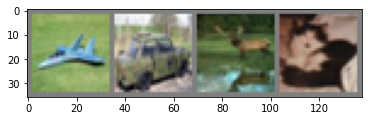

plane   car  deer   cat
<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([4, 3, 32, 32])


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(type(trainloader))
print(images.shape)

**Architecture network, Optimizer and Loss function**

In [6]:
epochs = 10
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


**Check GPU**

In [7]:
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)


**Training model (not GPU)**

In [15]:
for epoch in range(epochs): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
    inputs, labels = data
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = model(inputs)
    # print(outputs, labels, '======')
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,  2000] loss: 1.979
[1,  4000] loss: 1.970
[1,  6000] loss: 1.978
[1,  8000] loss: 1.965
[1, 10000] loss: 1.968
[1, 12000] loss: 1.972
[2,  2000] loss: 1.973
[2,  4000] loss: 1.973
[2,  6000] loss: 1.964
[2,  8000] loss: 1.962
[2, 10000] loss: 1.963
[2, 12000] loss: 1.966
Finished Training


**Training model with GPU**

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# model.to(device)

# Hãy nhớ rằng bạn phải gửi inputs và targets tại mỗi bước huấn luyện lên GPU:

for epoch in range(epochs): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)   # send input and label to GPU in each step
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = model(inputs)
    # print(outputs, labels, '======')
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training')


cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,  2000] loss: 2.200
[1,  4000] loss: 2.138
[1,  6000] loss: 2.129
[1,  8000] loss: 2.105
[1, 10000] loss: 2.099
[1, 12000] loss: 2.080
[2,  2000] loss: 2.078
[2,  4000] loss: 2.078
[2,  6000] loss: 2.072
[2,  8000] loss: 2.059
[2, 10000] loss: 2.056
[2, 12000] loss: 2.063
[3,  2000] loss: 2.044
[3,  4000] loss: 2.047
[3,  6000] loss: 2.048
[3,  8000] loss: 2.041
[3, 10000] loss: 2.055
[3, 12000] loss: 2.037
[4,  2000] loss: 2.042
[4,  4000] loss: 2.043
[4,  6000] loss: 2.034
[4,  8000] loss: 2.037
[4, 10000] loss: 2.033
[4, 12000] loss: 2.032
[5,  2000] loss: 2.020
[5,  4000] loss: 2.034
[5,  6000] loss: 2.031
[5,  8000] loss: 2.025
[5, 10000] loss: 2.047
[5, 12000] loss: 2.044
[6,  2000] loss: 2.021
[6,  4000] loss: 2.032
[6,  6000] loss: 2.029
[6,  8000] loss: 2.038
[6, 10000] loss: 2.013
[6, 12000] loss: 2.024
[7,  2000] loss: 2.011
[7,  4000] loss: 2.008
[7,  6000] loss: 2.011
[7,  8000] loss: 2.015
[7, 10000] loss: 2.024
[7, 12000] loss: 2.030
[8,  2000] loss: 2.019
[8,  4000] 

Test for 4 images

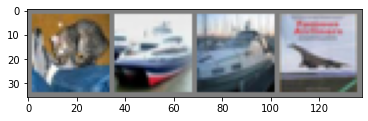

GroundTruth:   cat  ship  ship plane
<class 'torch.Tensor'>
torch.Size([4, 10])
Predicted:    cat   car   car  ship


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [10]:
# Hiển thị một vài dữ liệu
# Sử dụng hàm iter để biến testloader thành 1 iterator, từ đó có thể lấy các giá trị tiếp theo.
dataiter = iter(testloader)
datatest = dataiter.next()
images, labels = datatest[0].to(device), datatest[1].to(device) # for gpu

# print image
imshow(torchvision.utils.make_grid(datatest[0]))
print('GroundTruth: {}'.format(' '.join('%5s' % classes[labels[j]] for j in range(4))))

outputs = model(images)
print(type(outputs))
print(outputs.shape)

_,  predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Test for all test images

In [ ]:
print(type(labels))
print(type(images))

print(labels.shape)
print(images.shape)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)   # for gpu
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Test for each class

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)   # for gpu
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
